# Dimensionality Reduction

Many Machine Learning problems involve thousands or even millions of features foreach  training  instance.  Not  only  do  all  these  features  make  training  extremely  slow,but  they  can  also  make  it  much  harder  to  find  a  good  solution,  as  we  will  see. Thisproblem is often referred to as the curse of dimensionality.

Fortunately, in realworld problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. For example,consider the MNIST images: the pixels on the image borders  are  almost  always  white,  so  you  could  completely  drop  these  pixels  from  the training  set  without  losing  much  information. Additionally, two neighboring pixels  are  often  highly  correlated:  if  you  merge  them  into  a  single  pixel  (e.g.,  by  taking the mean of the two pixel intensities), you will not lose much information.

Reducing  dimensionality  does  cause  some  information  loss  (just like  compressing  an  image  to  JPEG  can  degrade  its  quality),  soeven  though  it  will  speed  up  training,  it  may  make  your  system perform  slightly  worse.  It  also  makes  your  pipelines  a  bit  more complex  and  thus  harder  to  maintain.  So,  if  training  is  too  slow, you  should  first  try  to  train  your  system  with  the  original  data before  considering  using  dimensionality  reduction.  In  some  cases, reducing  the  dimensionality  of  the  training  data  may  filter  outsome  noise  and  unnecessary  details  and  thus  result  in  higher  performance, but in general it won’t; it will just speed up training.

Apart  from  speeding  up  training,  dimensionality  reduction  is  also  extremely  usefulfor data visualization (or DataViz). Reducing the number of dimensions down to two(or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns, such  as  clusters.  Moreover,  DataViz  is  essential  to  communicate  your  conclusions  to people who are not data scientists in particular, decision makers who will use your results.In  this  chapter  we  will  discuss  the  curse  of  dimensionality  and  get  a  sense  of  whatgoes on in high-dimensional space. Then, we will consider the two main approachesto  dimensionality  reduction  (projection  and  Manifold  Learning),  and  we  will  gothrough three of the most popular dimensionality reduction techniques: PCA, KernelPCA, and LLE.

## The Curse of Dimensionality

We are so used to living in three dimensions1 that our intuition fails us when we try to imagine a high-dimensional space. Even a basic 4D hypercube is incredibly hard topicture in our minds (see Figure 8-1), let alone a 200-dimensional ellipsoid bent in a 1,000-dimensional space.

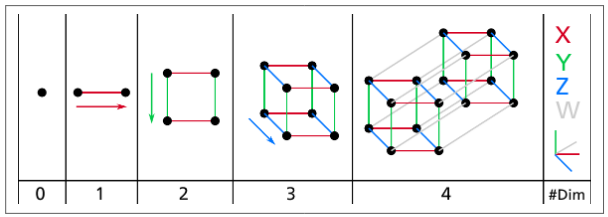

It turns out that many things behave very differently in high-dimensional space. For example, if you pick a random point in a unit square (a 1 × 1 square), it will have onlyabout a 0.4% chance of being located less than 0.001 from a border (in other words, it is very unlikely that a random point will be “extreme” along any dimension). But in a 10,000-dimensional unit hypercube, this probability is greater than 99.999999%. Mostpoints in a high-dimensional hypercube are very close to the border.

Here  is  a  more  troublesome  difference:  if  you  pick  two  points  randomly  in  a  unitsquare, the distance between these two points will be, on average, roughly 0.52. If youpick two random points in a unit 3D cube, the average distance will be roughly 0.66. But  what  about  two  points  picked  randomly  in  a  1,000,000-dimensional  hypercube?The average distance, believe it or not, will be about 408.25 (roughly 1, 000, 000/6)!This is counterintuitive: how can two points be so far apart when they both lie within the  same  unit  hypercube?  Well,  there’s  just  plenty  of  space  in  high  dimensions.  As  aresult,  high-dimensional  datasets  are  at  risk  of  being  very  sparse:  most  training in stances  are  likely  to  be  far  away  from  each  other.  This  also  means  that  a  new instance will likely be far away from any training instance, making predictions muchless reliable than in lower dimensions, since they will be based on much larger extrapolations.  In  short,  the  more  dimensions  the  training  set  has,  the  greater  the  risk  of overfitting it.

In theory, one solution to the curse of dimensionality could be to increase the size of the  training  set  to  reach  a  sufficient  density  of  training  instances.  Unfortunately,  in practice,  the  number  of  training  instances  required  to  reach  a  given  density  grows exponentially  with  the  number  of  dimensions.  With  just  100  features  (significantly fewer  than  in  the  MNIST  problem),  you  would  need  more  training  instances  than atoms  in  the  observable  universe  in  order  for  training  instances  to  be  within  0.1  of each  other  on  average,  assuming  they  were  spread  out  uniformly  across  all  dimensions.

## Main Approaches for Dimensionality Reduction

Before  we  dive  into  specific  dimensionality  reduction  algorithms,  let’s  take  a  look  at the  two  main  approaches  to  reducing  dimensionality:  projection  and  ManifoldLearning.

### Projection

In most realworld problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated (as discussed earlier for MNIST). As a result, all training instances lie within (or close to)  a  much  lower-dimensional  subspace  of  the  high-dimensional  space.  This  sounds very abstract, so let’s look at an example. In Figure below you can see a 3D dataset represented by circles.

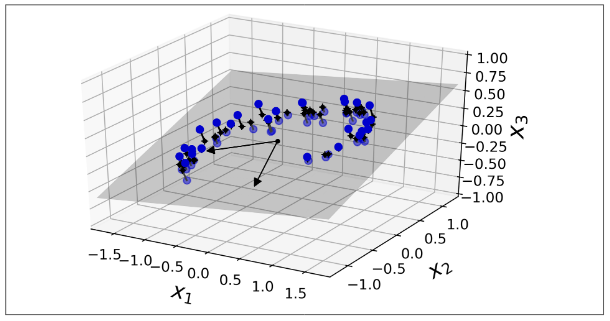

Notice that all training instances lie close to a plane: this is a lower-dimensional (2D) subspace  of  the  high-dimensional  (3D)  space.  If  we  project  every  training  instance perpendicularly  on to  this  subspace  (as  represented  by  the  short  lines  connecting  the instances  to  the  plane),  we  get  the  new  2D  dataset  shown  in  Figure below.  Ta-da!  We have just reduced the dataset’s dimensionality from 3D to 2D. Note that the axes correspond to new features z1 and z2 (the coordinates of the projections on the plane).

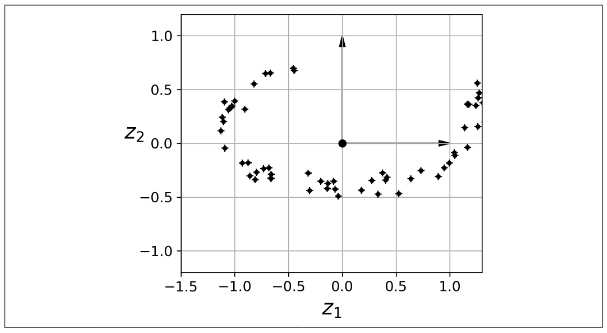



However,  projection  is  not  always  the  best  approach  to  dimensionality  reduction.  In many cases the subspace may twist and turn, such as in the famous Swiss roll toy data‐set represented in Figure below.

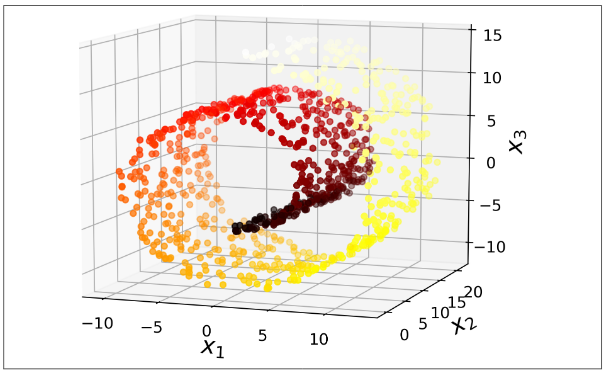

Simply projecting onto a plane (e.g., by dropping x3) would squash different layers of the Swiss roll together, as shown on the left side of Figure below. What you really want is to unroll the Swiss roll to obtain the 2D dataset on the right side of Figure below.

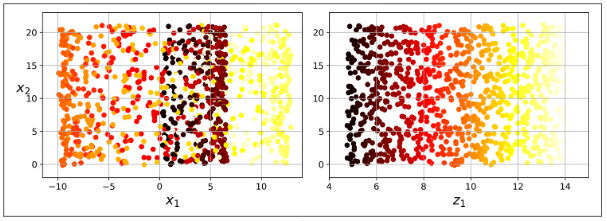

### Manifold Learning

The  Swiss  roll  is  an  example  of  a  2D  manifold.  Put  simply,  a  2D  manifold  is  a  2D shape  that  can  be  bent  and  twisted  in  a  higher-dimensional  space.  More  generally,  a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension.

Many dimensionality reduction algorithms work by modeling the manifold on which the  training  instances  lie;  this  is  called  Manifold  Learning.  It  relies  on  the  manifold assumption,  also  called  the  manifold  hypothesis,  which  holds  that  most  real-world high-dimensional  datasets  lie  close  to  a  much  lower-dimensional  manifold.  This assumption is very often empirically observed.

Once again, think about the MNIST dataset: all handwritten digit images have some similarities.  They  are  made  of  connected  lines,  the  borders  are  white,  and  they  are more  or  less  centered.  If  you  randomly  generated  images,  only  a  ridiculously  tiny fraction  of  them  would  look  like  handwritten  digits.  In  other  words,  the  degrees  of freedom available to you if you try to create a digit image are dramatically lower than the  degrees  of  freedom  you  would  have  if  you  were  allowed  to  generate  any  image you  wanted.  These  constraints  tend  to  squeeze  the  dataset  into  a  lower-dimensional manifold.

The manifold assumption is often accompanied by another implicit assumption: that the  task  at  hand  (e.g.,  classification  or  regression)  will  be  simpler  if  expressed  in  the lower-dimensional  space  of  the  manifold.  For  example,  in  the  top  row  of  Figure  below  Swiss  roll  is  split  into  two  classes:  in  the  3D  space  (on  the  left),  the  decision boundary  would  be  fairly  complex,  but  in  the  2D  unrolled  manifold  space  (on  theright), the decision boundary is a straight line.

However, this implicit assumption does not always hold. For example, in the bottomrow of figure below, the decision boundary is located at x1 = 5. This decision boundary looks very simple in the original 3D space (a vertical plane), but it looks more complex in the unrolled manifold (a collection of four independent line segments).

In short, reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

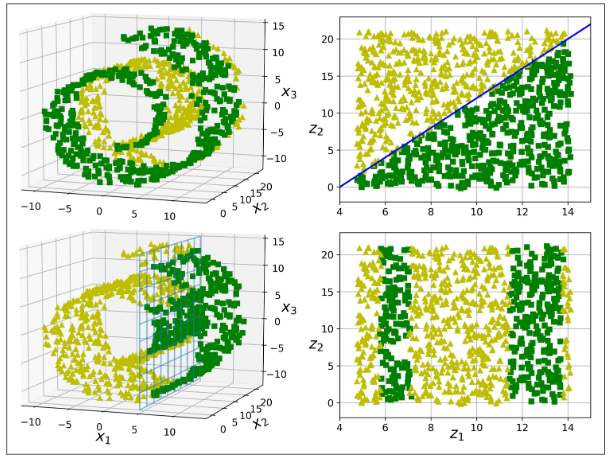

## PCA

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

### Preserving The Variance

Before  you  can  project  the  training  set  onto  a  lower-dimensional  hyperplane,  you first need to choose the right hyperplane. For example, a simple 2D dataset is represented on the left in Figure below, along with three different axes (i.e., 1D hyperplanes).On  the  right  is  the  result  of  the  projection  of  the  dataset  onto  each  of  these  axes.  As you can see, the projection onto the solid line preserves the maximum variance, while the  projection  onto  the  dotted  line  preserves  very  little  variance  and  the  projection onto the dashed line preserves an intermediate amount of variance.

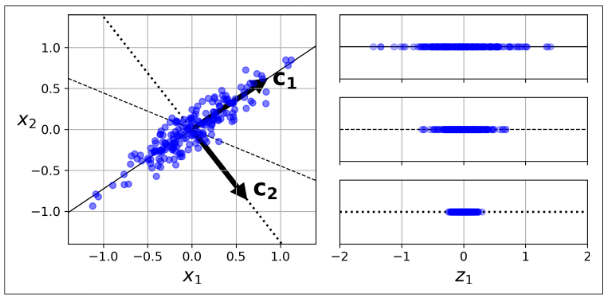

It  seems  reasonable  to  select  the  axis  that  preserves  the  maximum  amount  of  variance, as it will most likely lose less information than the other projections. Another way  to  justify  this  choice  is  that  it  is  the  axis  that  minimizes  the  mean  squared  distance between the original dataset and its projection onto that axis. This is the rather simple idea behind PCA.

### Principal Components

PCA identifies the axis that accounts for the largest amount of variance in the training set. In Figure above, it is the solid line. It also finds a second axis, orthogonal to the first  one,  that  accounts  for  the  largest  amount  of  remaining  variance.  In  this  2D example there is no choice: it is the dotted line. If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and a fourth,a fifth, and so on as many axes as the number of dimensions in the dataset. The  i<sup>th</sup>  axis  is  called  the  i<sup>th</sup> principal  component  (PC)  of  the  data.  In  Figure above,  the first  PC  is  the  axis  on  which  vector  c<sub>1</sub>  lies,  and  the  second  PC  is  the  axis  on  whichvector  c<sub>2</sub>  lies.

For each principal component, PCA finds a zero-centered unit vector  pointing  in  the  direction  of  the  PC.  Since  two  opposing  unit vectors  lie  on  the  same  axis,  the  direction  of  the  unit  vectorsreturned  by  PCA  is  not  stable:  if  you  perturb  the  training  sets lightly and run PCA again, the unit vectors may point in the opposite  direction  as  the  original  vectors.  However,  they  will  generally still lie on the same axes. In some cases, a pair of unit vectors may even rotate or swap (if the variances along these two axes are close), but the plane they define will generally remain the same.

There  is  a standard  matrix  factorization  technique  called  Singular  Value  Decomposition  (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices UΣV<sup>⊺</sup>, where V contains the unit vectors that define all the principal components that we are looking for, as shown in Equation below.

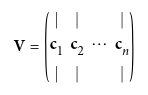

Let's build a simple 3D dataset:

In [1]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [39]:
# For plotting
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

The  following  Python  code  uses  NumPy’s  svd()  function  to  obtain  all  the  principal components of the training set, then extracts the two unit vectors that define the first two PCs

In [2]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c1, c2

(array([0.93636116, 0.29854881, 0.18465208]),
 array([-0.34027485,  0.90119108,  0.2684542 ]))

In [3]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [4]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

PCA assumes that the dataset is centered around the origin. As we will see, Scikit-Learn's PCA yourself (as in the preceding example), of if you use other libaries don't forgot to center the data first.

### Projecting Down to d Dimensions

Once  you  have  identified  all  the  principal  components,  you  can  reduce  the  dimenionality  of  the  dataset  down  to  d  dimensions  by  projecting  it  onto  the  hyperplane defined by the first d principal components. Selecting this hyperplane ensures that the projection will preserve as much variance as possible.

To project the training set onto the hyperplane and obtain a reduced dataset X<sub>d-proj</sub> of dimensionality  d,  compute  the  matrix  multiplication  of  the  training  set  matrix  X  by the matrix W<sub>d</sub>, defined as the matrix containing the first d columns of V, as shown in Equation below.

X<sub>d‐proj</sub> = XW<sub>d</sub>

The following Python code projects the training set onto the plane defined by the first two principal components:

In [5]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

X2D_using_svd = X2D

### Using Scikit-Learn

Scikit-Learn’s PCA class uses SVD decomposition to implement PCA, just like we did earlier in this chapter. The following code applies PCA to reduce the dimensionality of the dataset down to two dimensions (note that it automatically takes care of centering the data).

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [7]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

Notice that running PCA multiple times on slightly different datasets may result in different results. In general the only difference is that some axes may be flipped. In this example, PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped.

In [8]:
np.allclose(X2D, -X2D_using_svd)

True

Recover the 3D points projected on the plane (PCA 2D subspace).

In [9]:
X3D_inv = pca.inverse_transform(X2D)

Of course, there was some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points:

In [10]:
np.allclose(X3D_inv, X)

False

We can compute the reconstruction error:

In [11]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

The inverse transform in the SVD approach looks like this:

In [12]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

The `PCA` object gives access to the principal components that it computed:

The reconstructions from both methods are not identical because Scikit-Learn's `PCA` class automatically takes care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction:

In [13]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [14]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Compare to the first two principal components computed using the SVD method:

In [15]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

Notice how the axes are flipped.

### Explained Variance Ratio

Another  useful  piece  of  information  is  the  explained  variance  ratio  of  each  principal component,  available  via  the  explained_variance_ratio_  variable.  The  ratio  indicates  the  proportion  of  the  dataset’s  variance  that  lies  along  each  principal  component.

In [16]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [17]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

This  output  tells  you  that  84.2%  of  the  dataset’s  variance  lies  along  the  first  PC,  and 14.6%  lies  along  the  second  PC.  This  leaves  less  than  1.2%  for  the  third  PC,  so  it  is reasonable to assume that the third PC probably carries little information.

Here is how to compute the explained variance ratio using the SVD approach (recall that `s` is the diagonal of the matrix `S`):

In [18]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

### Choosing the Right Number of Dimensions

Instead  of  arbitrarily  choosing  the  number  of  dimensions  to  reduce  down  to,  it  is simpler  to  choose  the  number  of  dimensions  that  add  up  to  a  sufficiently  large  portion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality for data visualization in that case you will want to reduce the dimensionality down to 2 or 3.

The  following  code  performs  PCA  without  reducing  dimensionality,  then  computesthe  minimum  number  of  dimensions  required  to  preserve  95%  of  the  training  set’s variance:

In [19]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [20]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

You  could  then  set  n_components=d  and  run  PCA  again.  But  there  is  a  much  better option:  instead  of  specifying  the  number  of  principal  components  you  want  to  preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [22]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(X_train)

pca.n_components_

154

Yet  another  option  is  to  plot  the  explained  variance  as  a  function  of  the  number  of dimensions (simply plot cumsum; see Figure below). There will usually be an elbow in the curve, where the explained variance stops growing fast. In this case, you can see that reducing  the  dimensionality  down  to  about  100  dimensions  wouldn’t  lose  too  much explained variance.

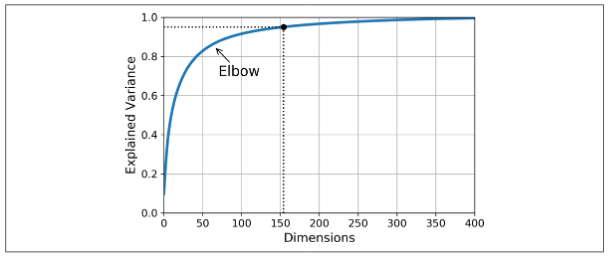

### PCA for Compresson

Obviously  after  dimensionality  reduction,  the  training  set  takes  up  much  less  space. For example, try applying PCA to the MNIST dataset while preserving 95% of its variance.  You  should  find  that  each  instance  will  have  just  over  150  features,  instead  of the  original  784  features.  So  while  most  of  the  variance  is  preserved,  the  dataset  is now less than 20% of its original size! This is a reasonable compression ratio, and you can  see  how  this  can  speed  up  a  classification  algorithm  (such  as  an  SVM  classifier) tremendously.

It  is  also  possible  to  decompress  the  reduced  dataset  back  to  784  dimensions  by applying the inverse transformation of the PCA projection. Of course this won’t give you  back  the  original  data,  since  the  projection  lost  a  bit  of  information  (within  the 5%  variance  that  was  dropped),  but  it  will  likely  be  quite  close  to  the  original  data. The  mean  squared  distance  between  the  original  data  and  the  reconstructed  data (compressed and then decompressed) is called the reconstruction error. For example, the following code compresses the MNIST dataset down to 154 dimensions, then uses the   inverse_transform()   method   to   decompress   it   back   to   784   dimensions. Figure below shows a few digits from the original training set (on the left), and the cor‐responding  digits  after  compression  and  decompression.  You  can  see  that  there  is  as light image quality loss, but the digits are still mostly intact.

In [43]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

Text(0.5, 1.0, 'Compressed')

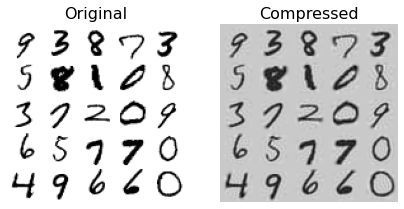

In [44]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

The equation of the inverse transform is shown below.

X<sub>recovered</sub> = 𝐀<sub>d‐proj</sub>·W<sub>d</sub><sup>T</sup>

### Randomized PCA

Scikit-Learn offers yet another option to perform PCA, called Randomized PCA. This is  a  stochastic  algorithm  that  quickly  finds  an  approximation  of  the  first  d  principal components. Its computational complexity is O(m × d<sup>2</sup>) + O(d<sup>3</sup>), instead of O(m × n<sup>2</sup>)+  O(n<sup>3</sup>),  so  it  is  dramatically  faster  than  the  previous  algorithms  when  d  is  much  smaller than n.

In [45]:
X_reduced_pca = X_reduced

rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Incremental PCA

One problem with the preceding implementation of PCA is that it requires the whole training  set  to  fit  in  memory  in  order  for  the  SVD  algorithm  to  run.  Fortunately, Incremental  PCA  (IPCA)  algorithms  have  been  developed:  you  can  split  the  trainingset  into  mini-batches  and  feed  an  IPCA  algorithm  one  mini-batch  at  a  time.  This  isuseful  for  large  training  sets,  and  also  to  apply  PCA  online  (i.e.,  on  the  fly,  as  new instances arrive).

The  following  code  splits  the  MNIST  dataset  into  100  mini-batches  (using  NumPy’s array_split()  function)  and  feeds  them  to  Scikit-Learn’s  IncrementalPCA  class to  reduce  the  dimensionality  of  the  MNIST  dataset  down  to  154  dimensions.  Note  that  you  must  call  the  partial_fit()  method  with  each  mini-batch rather than the fit() method with the whole training set:

In [46]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [47]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

Let's check that compression still works well:

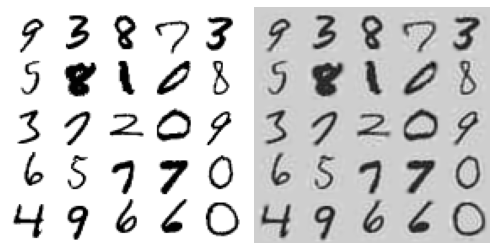

In [48]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

Let's compare the results of transforming MNIST using regular PCA and incremental PCA. First, then means are equal:

In [49]:
X_reduced_inc_pca = X_reduced

np.allclose(pca.mean_, inc_pca.mean_)

True

But the results are not exactly identical. Incremental PCA gives a very good approximate solution, but it's not perfect:

In [50]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

Let's create the `memmap()` structure and copy the MNIST data into it. This would typically be done by a first program:

In [51]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

Now deleting the `memmap()` object will trigger its Python finalizer, which ensures that the data is saved to disk.

In [52]:
del X_mm

Next, another program would load the data and use it for training:

In [53]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

Alternatively,  you  can  use  NumPy’s  memmap  class,  which  allows  you  to  manipulate  a large  array  stored  in  a  binary  file  on  disk  as  if  it  were  entirely  in  memory;  the  class loads  only  the  data  it  needs  in  memory,  when  it  needs  it.  Since  the  IncrementalPCA class uses only a small part of the array at any given time, the memory usage remains under control. This makes it possible to call the usual fit() method, as you can see in the following code:

In [82]:
# X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

# batch_size = m // n_batches
# inc_pca = IncrementalPCA(n_components=153, batch_size=batch_size)
# inc_pca.fix(X_mm)

### Time Complexity

Let's compare the time complexity of regular PCA against Incremental PCA and Randomized PCA, for various number of principal components:

In [83]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for name, pca in (("PCA", regular_pca), ("Inc PCA", inc_pca), ("Rnd PCA", rnd_pca)):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(name, t2 - t1))

n_components = 2
    PCA: 11.0 seconds
    Inc PCA: 19.8 seconds
    Rnd PCA: 3.5 seconds
n_components = 10
    PCA: 7.8 seconds
    Inc PCA: 17.4 seconds
    Rnd PCA: 3.2 seconds
n_components = 154
    PCA: 7.8 seconds
    Inc PCA: 25.1 seconds
    Rnd PCA: 6.0 seconds


Now let's compare PCA and Randomized PCA for datasets of different sizes (number of instances):

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

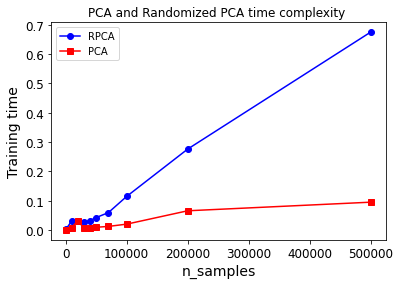

In [86]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

And now let's compare their performance on datasets of 2,000 instances with various numbers of features:

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

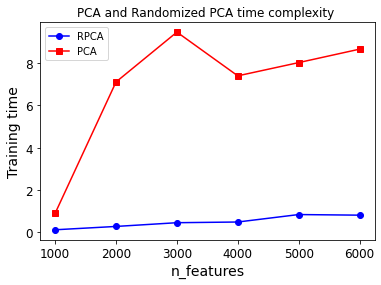

In [87]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

## Kernel PCA

Kernel PCA is a  mathematical  technique  that  implicitly maps instances into a very high-dimensional space (called the feature space), enabling nonlinear  classification  and  regression  with  Support  Vector  Machines. A linear  decision  boundary  in  the  high-dimensional  feature  space  corresponds  to  acomplex nonlinear decision boundary in the original space.

It turns out that the same trick can be applied to PCA, making it possible to perform complex  nonlinear  projections  for  dimensionality  reduction.  This  is  called  KernelPCA  (kPCA). It  is  often  good  at  preserving  clusters  of  instances  after  projection,  orsometimes even unrolling datasets that lie close to a twisted manifold.

For example, the following code uses Scikit-Learn’s KernelPCA class to perform kPCAwith  an  RBF  kernel.

In [57]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [58]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

Figure below shows  the  Swiss  roll,  reduced  to  two  dimensions  using  a  linear  kernel(equivalent  to  simply  using  the  PCA  class),  an  RBF  kernel,  and  a  sigmoid  kernel(Logistic).

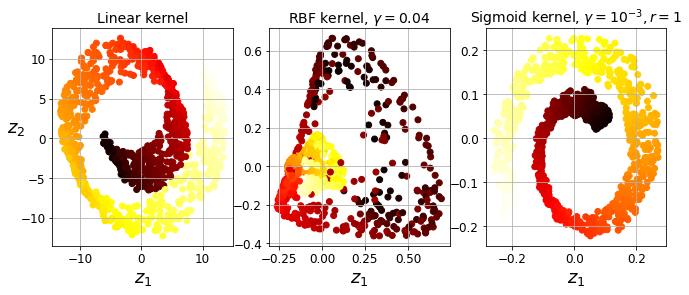

In [60]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

Kernel PCA and the reconstruction pre-image error (rbf):

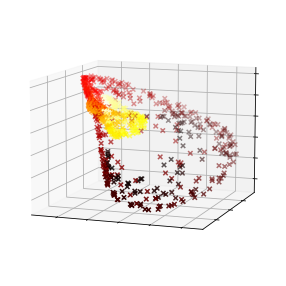

In [62]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

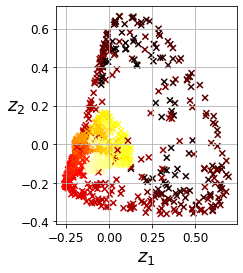

In [63]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

### Selecting a Kernel and Tuning Hyperparameters

As  kPCA  is  an  unsupervised  learning  algorithm,  there  is  no  obvious  performance measure  to  help  you  select  the  best  kernel  and  hyperparameter  values.  However, dimensionality  reduction  is  often  a  preparation  step  for  a  supervised  learning  task (e.g., classification), so you can simply use grid search to select the kernel and hyper‐parameters that lead to the best performance on that task. For example, the following code  creates  a  two-step  pipeline,  first  reducing  dimensionality  to  two  dimensions using  kPCA,  then  applying  Logistic  Regression  for  classification.  Then  it  uses  GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline:

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])
param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

# The best kernel and hyperparameters are then available through the best_params_ variable

print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


Another approach, this time entirely unsupervised, is to select the kernel and hyper‐parameters that yield the lowest reconstruction error. However, reconstruction is not as  easy  as  with  linear  PCA.  Here’s  why.  Figure  below  shows  the  original  Swiss  roll  3D dataset  (top  left),  and  the  resulting  2D  dataset  after  kPCA  is  applied  using  an  RBFkernel  (top  right).  Thanks  to  the  kernel  trick,  this  is  mathematically  equivalent  to mapping  the  training  set  to  an  infinite-dimensional  feature  space  (bottom  right) using  the  feature  map  φ,  then  projecting  the  transformed  training  set  down  to  2D using  linear  PCA.  Notice  that  if  we  could  invert  the  linear  PCA  step  for  a  given instance in the reduced space, the reconstructed point would lie in feature space, not in the original space (e.g., like the one represented by an x in the diagram). Since the feature  space  is  infinite-dimensional,  we  can not  compute  the  reconstructed  point, and therefore we can not compute the true reconstruction error. Fortunately, it is possible  to  find  a  point  in  the  original  space  that  would  map  close  to  the  reconstructed point. This is called the reconstruction pre-image. Once you have this pre-image, you can measure its squared distance to the original instance. You can then select the kernel and hyperparameters that minimize this reconstruction pre-image error.

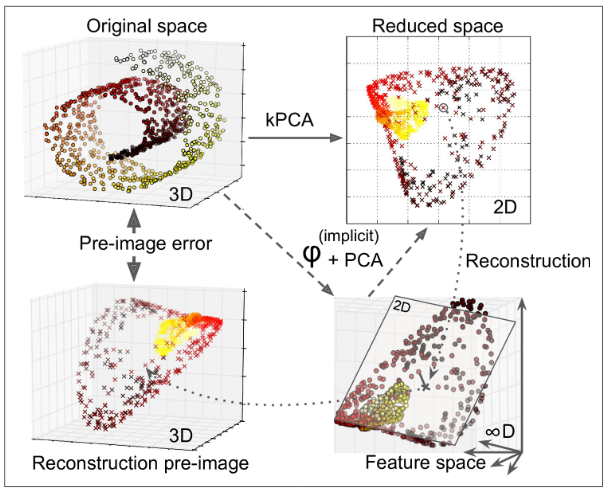

One way to perform this reconstruction is to train a supervised regression model, with the projected instances as the training set and the original  instances  as  the  targets.  Scikit-Learn  will  do  this  automatically  if  you  set fit_inverse_transform=True, as shown in the following code:

In [70]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

By  default,  fit_inverse_transform=False  and  KernelPCA  has  no inverse_transform()   method.   This   method   only   gets   created when you set fit_inverse_transform=True.

You can then compute the reconstruction pre-image error:

In [71]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576611

Now you can use grid search with cross-validation to find the kernel and hyperparameters that minimize this pre-image reconstruction error.

## LLE

Locally Linear Embedding (LLE) is another powerful nonlinear dimensionality reduction  (NLDR)  technique.  It  is  a  Manifold  Learning  technique  that  does  not  rely  on projections, like the previous algorithms do. In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking  for  a  low-dimensional  representation  of  the  training  set  where  these  local relationships are best preserved. This approach makes it particularly  good  at  unrolling  twisted  manifolds,  especially  when  there  is  not  too  much noise.

The  following  code  uses  Scikit-Learn’s  LocallyLinearEmbedding  class  to  unroll  theSwiss roll:

In [72]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [74]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

Unrolled Swiss roll using LLE:

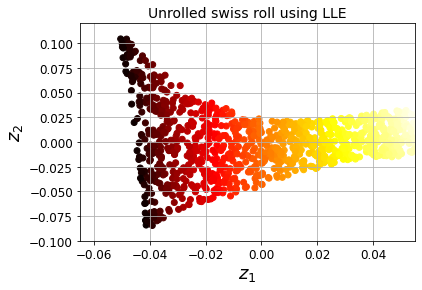

In [76]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

The  resulting  2D  dataset  is  shown  in  Figure  above.  As  you  can  see,  the  Swiss  roll  is completely  unrolled,  and  the  distances  between  instances  are  locally  well  preserved. However,  distances  are  not  preserved  on  a  larger  scale:  the  left  part  of  the  unrolled Swiss roll is stretched, while the right part is squeezed. Nevertheless, LLE did a pretty good job at modeling the manifold.

Here’s  how  LLE  works:  for  each  training  instance  x<sup>(i)</sup>,  the  algorithm  identifies  its  k closest neighbors (in the preceding code k = 10), then tries to reconstruct x<sup>(i)</sup> as a linear  function  of  these  neighbors.  More  specifically,  it  finds  the  weights  w<sub>i,j</sub>  such  that the squared distance between x<sup>(i)</sup> and ∑<sub>j=1</sub><sup>m</sup>w<sub>i,j</sub>x<sup>j</sup> is as small as possible, assuming w<sub>i,j</sub> = 0 if x<sup>(j)</sup> is not one of the k closest neighbors of x<sup>(i)</sup>. Thus the first step of LLE is theconstrained optimization problem described in Equation below, where W is the weight matrix  containing  all  the  weights  w<sub>i,j</sub>.  The  second  constraint  simply  normalizes  theweights for each training instance x<sup>(i)</sup>.

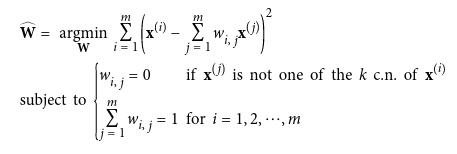

After  this  step,  the  weight  matrix  W  (containing  the  weights  w<sub>i,j</sub>)  encodes  the  local linear  relationships  between  the  training  instances.  The  second  step  is  to  map  the training  instances  into  a  d-dimensional  space  (where  d  <  n)  while  preserving  these local relationships as much as possible. If z<sup>(i)</sup> is the image of x<sup>(i)</sup> in this d-dimensional 
space, then we want the squared distance between z<sup>(i)</sup> and ∑<sup>m</sup><sub>j= 1</sub>w<sub>i,j</sub>z<sup>(j)</sup> to be as small as  possible.  This  idea  leads  to  the  unconstrained  optimization  problem  described  in Equation below. It looks very similar to the first step, but instead of keeping the instances  fixed  and  finding  the  optimal  weights,  we  are  doing  the  reverse:  keeping  the weights  fixed  and  finding  the  optimal  position  of  the  instances’  images  in  the  low-dimensional space. Note that Z is the matrix containing all z<sup>(i)</sup>.

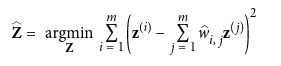

Scikit-Learn’s   LLE   implementation   has   the   following   computational   complexity: O(m log(m)n log(k)) for finding the k nearest neighbors, O(mnk<sup>3</sup>) for optimizing the weights, and O(dm<sup>2</sup>) for constructing the low-dimensional representations. Unfortunately, the m<sup>2</sup> in the last term makes this algorithm scale poorly to very large datasets.

## Other Dimensionality Reduction Techniques

There  are  many  other  dimensionality  reduction  techniques,  several  of  which  areavailable in Scikit-Learn. Here are some of the most popular ones:

**Random Projections**

    As its name suggests, projects the data to a lower-dimensional space using a random linear projection. This may sound crazy, but it turns out that such a random projection is actually very likely to preserve distances well, as was demonstrated mathematically  by  William  B.  Johnson  and  Joram  Lindenstrauss  in  a  famous lemma.  The  quality  of  the  dimensionality  reduction  depends  on  the  number  of instances and the target dimensionality, but surprisingly not on the initial dimensionality.  Check  out  the  documentation  for  the  sklearn.random_projection package for more details.
    

**Multidimensional Scaling (MDS)**

   Reduces  dimensionality  while  trying  to  preserve  the  distances  between  the instances.
    

In [77]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

**Isomap**
    
    Creates  a  graph  by  connecting  each  instance  to  its  nearest  neighbors,  then reduces  dimensionality  while  trying  to  preserve  the  geodesic  distances  between the instances.
    

In [78]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

**t-Distributed Stochastic Neighbor Embedding (t-SNE)**

    Reduces dimensionality while trying to keep similar instances close and dissimilar  instances  apart.  It  is  mostly  used  for  visualization,  in  particular  to  visualize clusters  of  instances  in  high-dimensional  space  (e.g.,  to  visualize  the  MNIST images in 2D).
    
    

In [79]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

/usr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


**Linear Discriminant Analysis (LDA)**

    Is a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit of this approach is that the projection will  keep  classes  as  far  apart  as  possible,  so  LDA  is  a  good  technique  to  reduce dimensionality  before  running  another  classification  algorithm  such  as  an  SVMclassifier.

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

Visualization of above mentioned techniques:

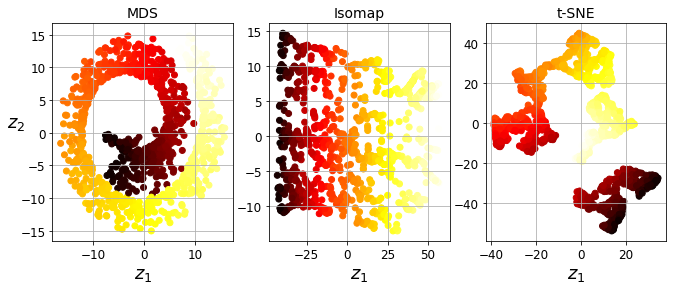

In [81]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()